* ver1
    - 한글 폰트 설치 -> 완료
    - 변수 생성 : OHTER_NM : 사용한 지역과 


* ver2
    - 시각화
        1. 광역시도의 각 월별 카드 사용량 및 방문 고객수의 변화량 시각화
        
* ver3
    - 시각화
        1. 업종 별 변화량 시각화해보기

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import gc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dacon-jeju/submission.csv
/kaggle/input/dacon-jeju/201901-202003.csv


In [2]:
# 한글 폰트 설치
!git clone https://github.com/namepen/nanum_font.git

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

font_dirs = ['nanum_font', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

mpl.rcParams['font.family'] = 'NanumGothic'

Cloning into 'nanum_font'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  if __name__ == '__main__':


## Load data

In [3]:
df = pd.read_csv('../input/dacon-jeju/201901-202003.csv')
sub = pd.read_csv('../input/dacon-jeju/submission.csv')

In [4]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


### 날짜(연도, 월) : REG_YYMM

* 2019년 1울부터 2020년 3월까지 총 15개 달의 데이터가 존재합니다.

Text(0.5, 1.0, 'Data count in each month')

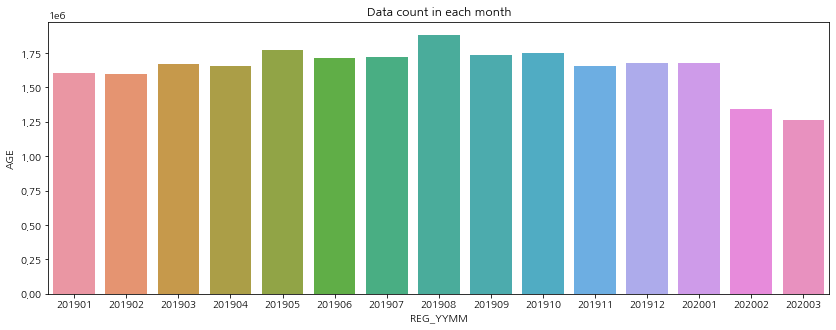

In [5]:
#df['REG_YYMM'].unique(), df['REG_YYMM'].nunique()

fig, ax = plt.subplots(1, 1, figsize= (14,5))
data = df.groupby('REG_YYMM')['AGE'].count().reset_index()
sns.barplot(x= data['REG_YYMM'], y=data['AGE'], ax=ax)
ax.set_title('Data count in each month')

### 지역

* 총 17개의 광역시도로 이루어져있습니다.
* 각 광역시도는 하위 지역으로 이루어졌음(세종 제외).
* 단, 우리가 예측해야할 데이터는 광역시도 단위로 예측해야함.

In [83]:
city_list = df['CARD_SIDO_NM'].unique()

도 단위로 같은 지역에서 사용했으면 0, 다른 지역에서 사용했으면 1인 변수를 생성.

In [25]:
df['OTHER_NM'] = df['CARD_SIDO_NM'] != df['HOM_SIDO_NM']

제주지역의 other따른 소비량을 살펴보자.

In [ ]:
'''
fig, ax = plt.subplots(1,1 , figsize=(12, 6))
data = df[df['CARD_SIDO_NM'] == '제주'].groupby(['REG_YYMM', 'OTHER_NM'])['AMT'].sum().reset_index()
sns.barplot(x='REG_YYMM', y='AMT', hue='OTHER_NM', data=data, ax=ax)'''

각 광역시도별 카드 사용량의 변화

In [ ]:
def my_plot(): 
    fig, ax = plt.subplots(17,1, figsize=(12, 6*17))
    for num, (city, temp) in enumerate(df.groupby('CARD_SIDO_NM')):
        data2 = temp.groupby(['REG_YYMM', 'OTHER_NM'])['AMT'].sum().reset_index()
        sns.barplot(x='REG_YYMM', y='AMT', hue='OTHER_NM', data=data2, ax=ax[num])
        ax[num].set_title(f'{city}')
#my_plot()

광역시도별 방문한 사람의 총합 변화

In [ ]:
def my_plot():    
    fig, ax = plt.subplots(17,1, figsize=(12, 6*17))
    for num, (city, temp) in enumerate(df.groupby('CARD_SIDO_NM')):
        data2 = temp.groupby(['REG_YYMM', 'OTHER_NM'])['CSTMR_CNT'].sum().reset_index()
        sns.barplot(x='REG_YYMM', y='CSTMR_CNT', hue='OTHER_NM', data=data2, ax=ax[num])
        ax[num].set_title(f'{city}')

#my_plot()

기간별 카드사용금액의 변환

In [ ]:
def my_plot2()    
    fig, ax= plt.subplots(2,1, figsize=(14,10))
    sns.barplot(x='REG_YYMM', y='AMT', data= df.groupby('REG_YYMM')['AMT'].sum().reset_index(), ax=ax[0])
    sns.barplot(x='REG_YYMM', y='CSTMR_CNT', data= df.groupby('REG_YYMM')['CSTMR_CNT'].sum().reset_index(), ax=ax[1])
    
#my_plot(2)

## 'STD_CLSS_NM'

총 41개의 업종이 존재합니다.

In [10]:
print(df['STD_CLSS_NM'].nunique(), df['STD_CLSS_NM'].unique())

41 ['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']


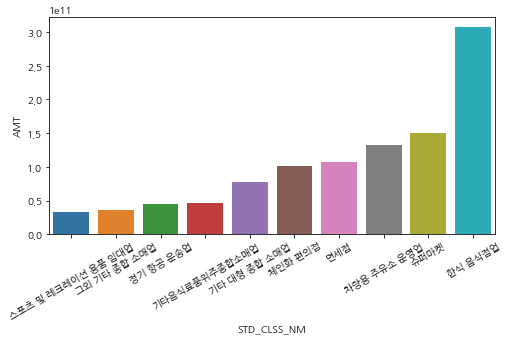

In [23]:
#sample plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
#data = df.loc[df['CARD_SIDO_NM']== '제주']
sns.barplot(x='STD_CLSS_NM', y='AMT', data=data.groupby('STD_CLSS_NM')['AMT'].sum().reset_index().sort_values('AMT')[-10:], ax=ax)
ax.xaxis.set_tick_params(rotation=30)


### 건강보조식품 소매업

동・식물성 엑스, 과실농축물, 벌꿀, 과당 등을 주성분으로 하여 비타민류, 철화합물 등을 첨가하여 만든 건강유지 또는 건강증진용 가공식품을 소매하는 산업활동을 말한다.

<예 시>
・식이용 가공식품 소매 ・가공건강식품 소매
・달팽이, 흑염소 엑기스 소매 ・알로에 가공품 소매

<색인어>
가공건강식품소매(구입소매), 건강보조식품소매(구입소매), 건강식품소매(구입소매), 김정문알로에(구입소매), 달팽이엑스소매(구입소매), 동물성엑스소매(구입소매), 선식소매, 스쿠알렌소매, 식물성엑스소매, 식이용가공식품소매, 알로에가공품소매, 알로에소매, 알로에액즙소매, 알로에제품소매, 정관장소매

In [24]:
data = df.loc[df['STD_CLSS_NM']=='건강보조식품 소매업']

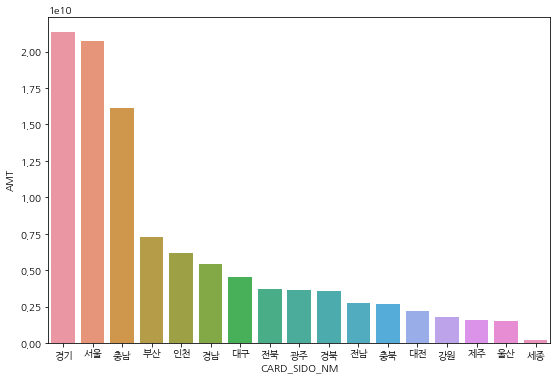

In [36]:
fig, ax = plt.subplots(1,1, figsize=(9, 6))
sns.barplot(x='CARD_SIDO_NM', y='AMT', 
            data=data.groupby('CARD_SIDO_NM')['AMT'].sum().reset_index().sort_values('AMT', ascending=False))

#sns.barplot(x='CARD_SIDO_NM', y='AMT', hue='CARD_CCG_NM',
#            data=data.groupby('CARD_SIDO_NM', 'CARD_CCG_NM')['AMT'].sum().reset_index().sort_values('AMT', ascending=False)[:3])

* 건강보조식품 판매업이 가장 많이 판매된 지역은 '경기', '서울', '충남', '부산', '인천' 순이다.
* 광역시도 중에서도 특정 시에 판매량이 높은 것을 볼 수 있다.
* 인천의 경우, `강화군`이 가장 높은 것을 볼 수 있다. 아마 특산물과 관련이 있지않을까 싶다.

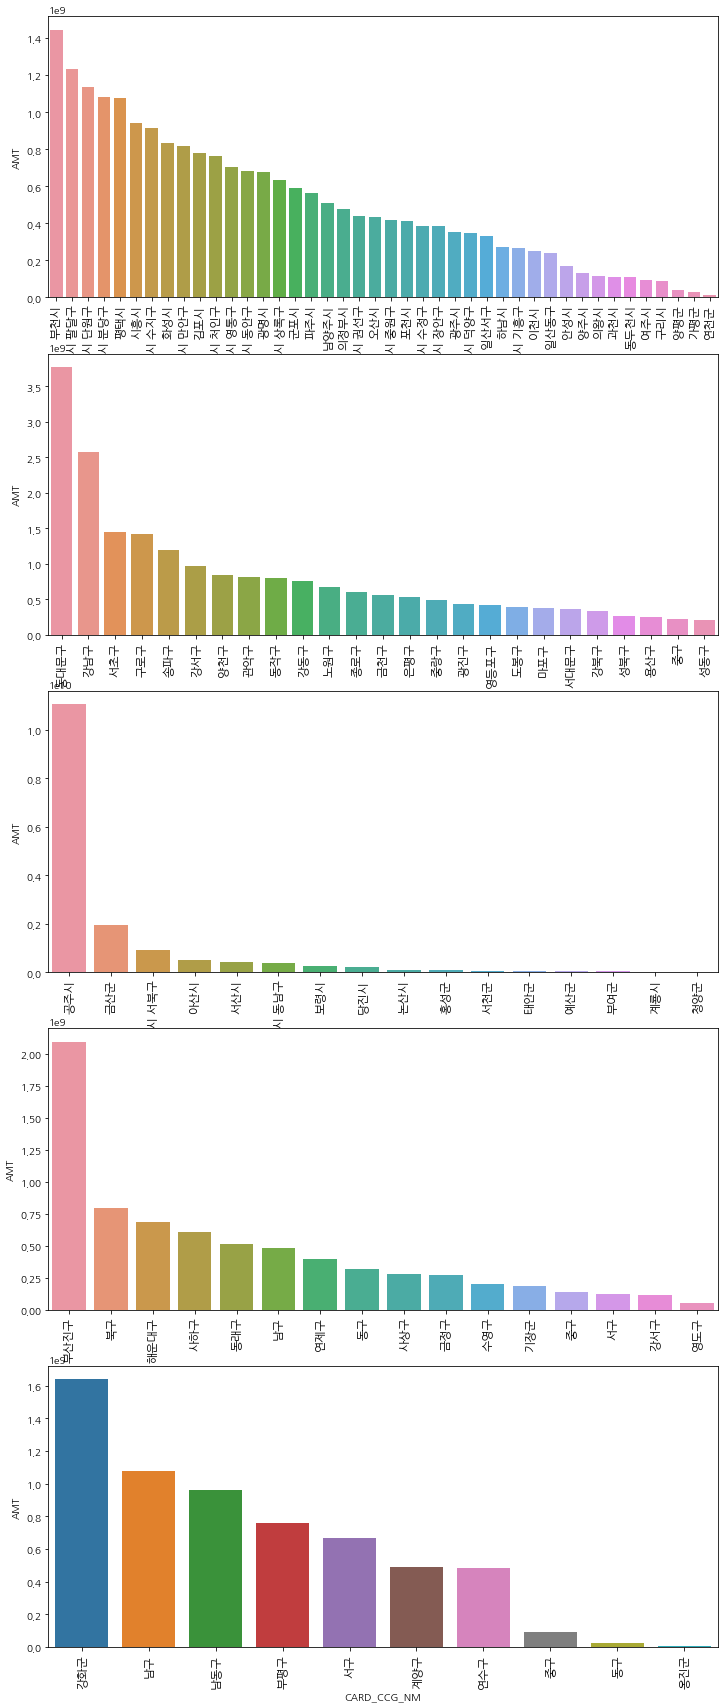

In [61]:
fig, ax = plt.subplots(5,1, figsize=(12, 30))

for num, city in enumerate(['경기', '서울', '충남', '부산', '인천']):
    sns.barplot(x='CARD_CCG_NM', y='AMT', 
                data=data.loc[data['CARD_SIDO_NM']==city].groupby('CARD_CCG_NM')['AMT'].sum().reset_index().\
                sort_values('AMT', ascending=False), ax=ax[num])
    ax[num].xaxis.set_tick_params(rotation=90, labelsize=12)

5개 광역시도에서 가장 높은 지역을 뽑아 월별 판매량을 살펴보자.

'부천시' , '동대문구', '공주시', '부산진구', '강화군'

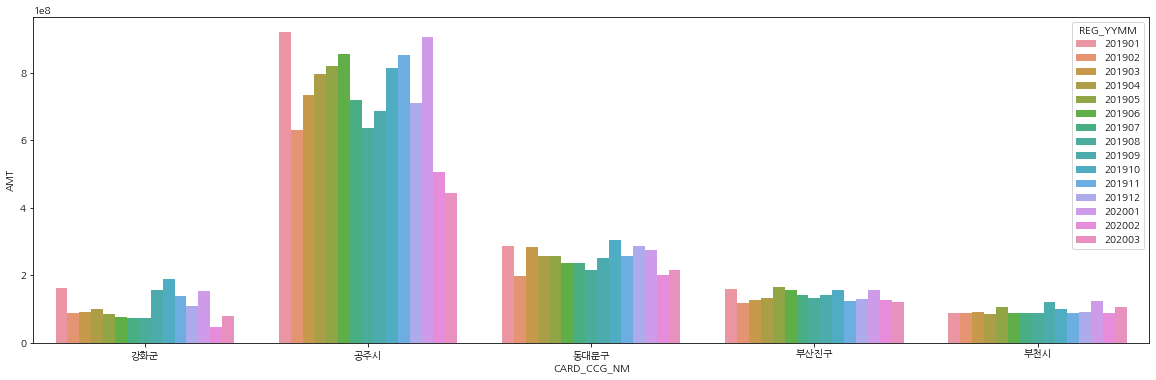

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.barplot(x='CARD_CCG_NM', y='AMT', hue='REG_YYMM',
            data= data.loc[data['CARD_CCG_NM'].isin(['부천시' , '동대문구', '공주시', '부산진구', '강화군'])].groupby(['REG_YYMM', 'CARD_CCG_NM'])['AMT'].sum().reset_index())

## 운송업

운송업 관련 업종은 4가지가 있다.

* '버스 운송업', '택시 운송업', '내항 여객 운송업', '정기 항공 운송업'
* 특정 운송업을 운행하지 않는 지역은 해당 업종의 매출 데이터가 존재하지않는다.
* 주어진 기간동안의 데이터가 모두 존재하지 않는 지역, 업종이 있다. 예를 들어 전남의 택시 운송업은 2019년 05월 데이터만 존재한다.


In [76]:
tran_list = [i for i in df['STD_CLSS_NM'].unique() if '운송업'  in i]

In [98]:
def city_tran_plot():
    for num, ci in enumerate(city_list):
        fig, ax = plt.subplots(1, 4, figsize=(32, 8))
        data = df.loc[df['CARD_SIDO_NM'] == ci]

        for num2, i in enumerate(tran_list):
            try:
                sns.barplot(x='REG_YYMM', y='AMT', data= data.loc[data['STD_CLSS_NM'] == i].groupby('REG_YYMM')['AMT']\
                            .sum().reset_index(), ax=ax[num2])
            except ValueError:
                pass
            ax[num2].set_title(f"{ci}_{i}", fontsize= 20)
        plt.show()

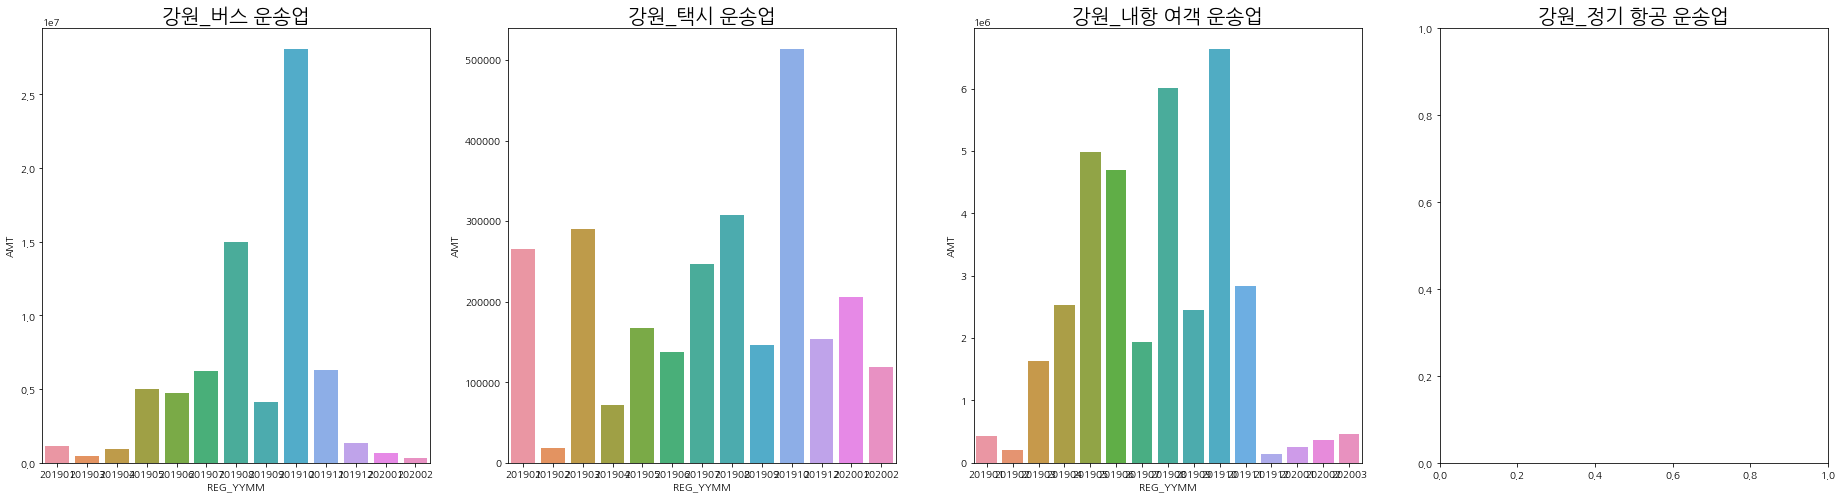

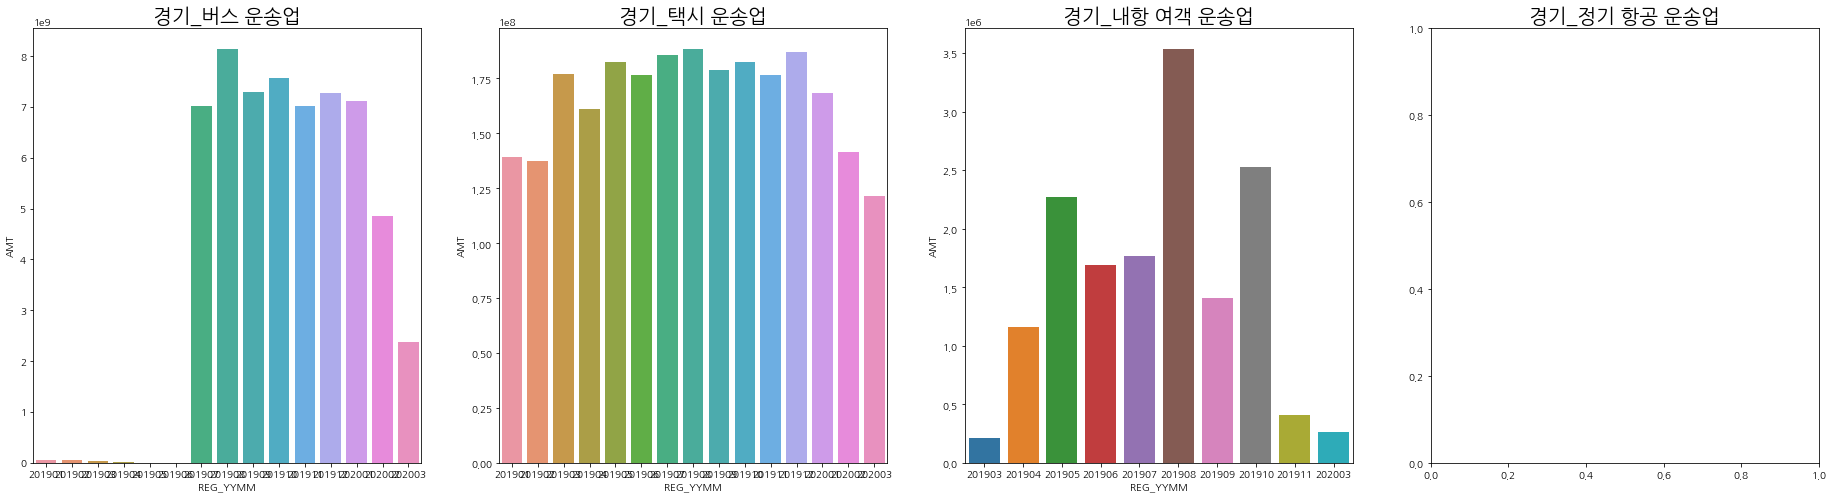

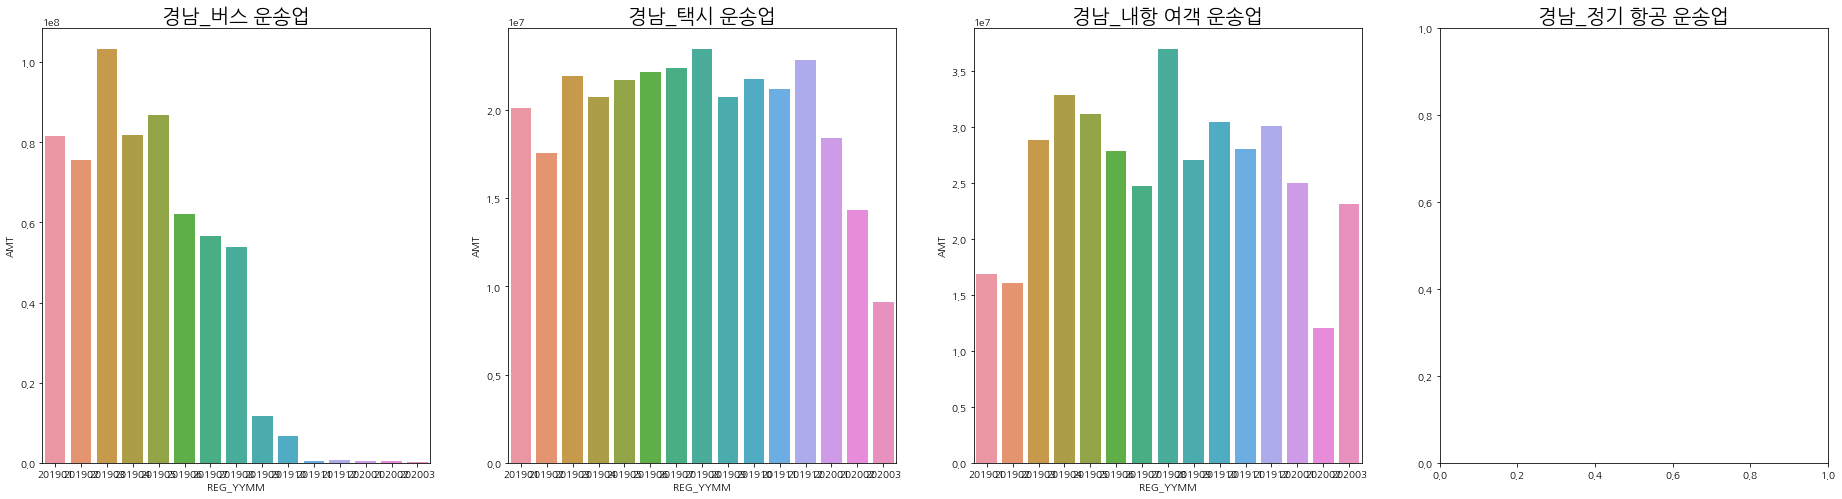

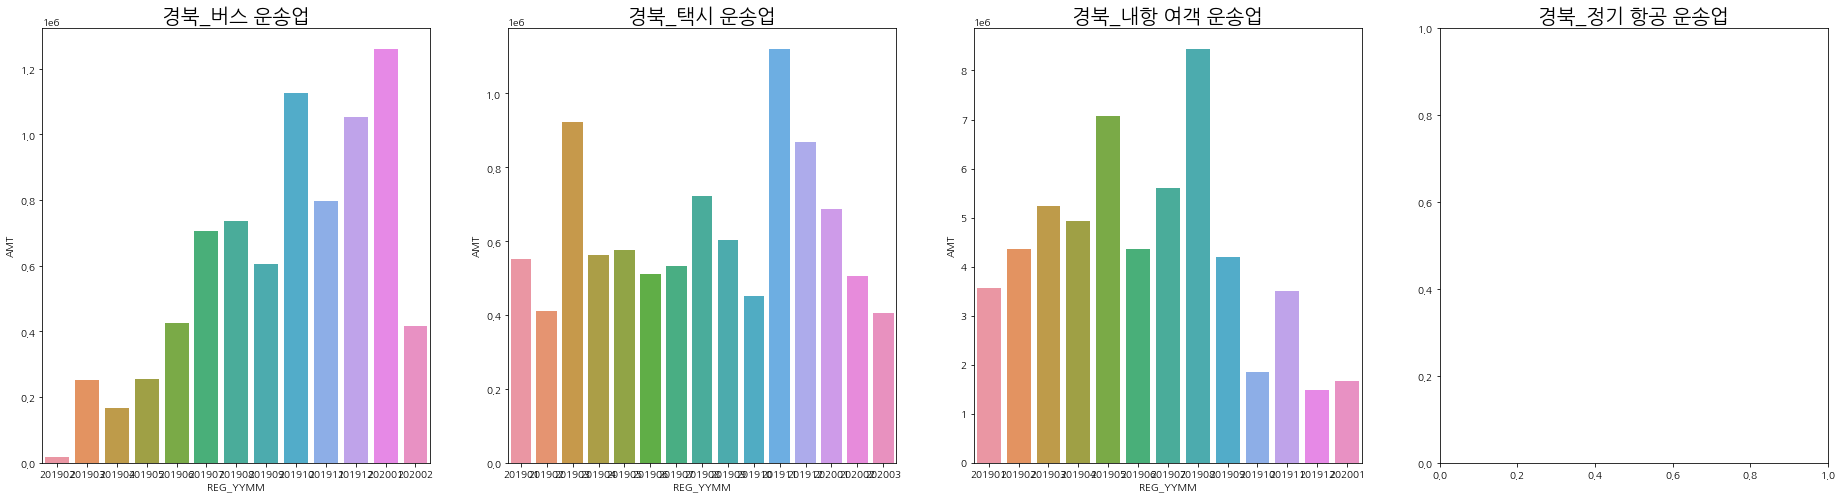

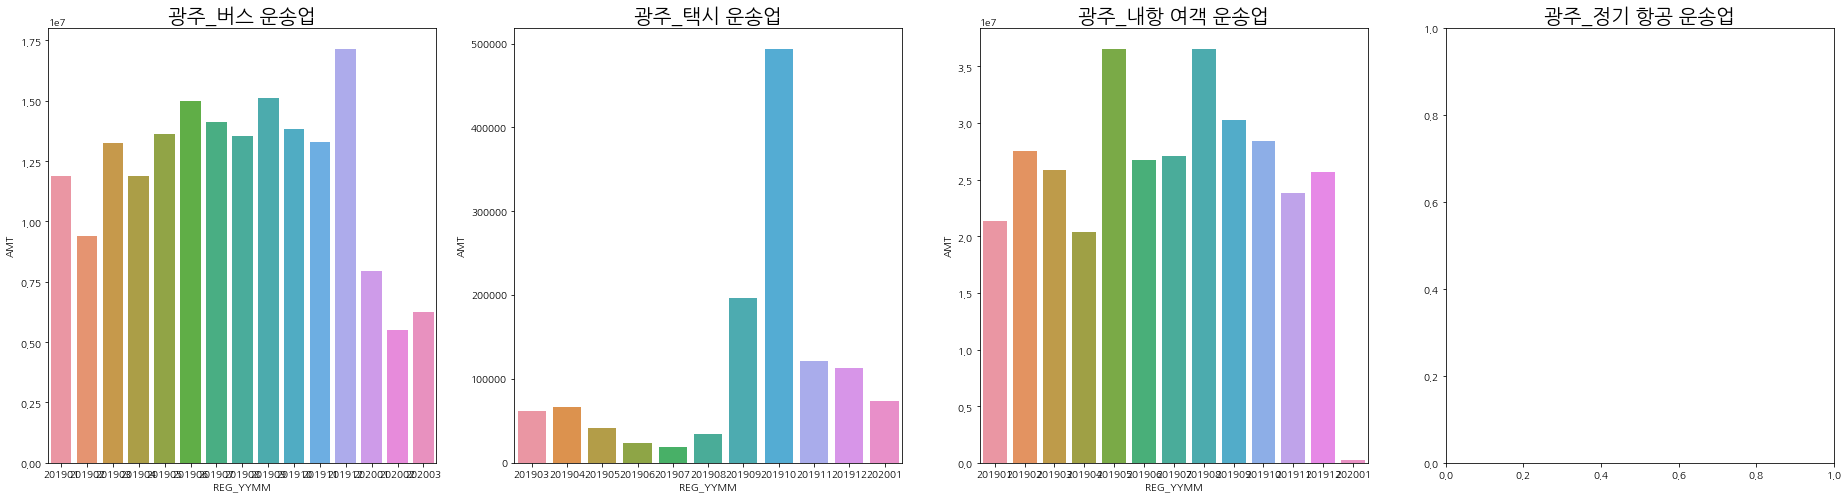

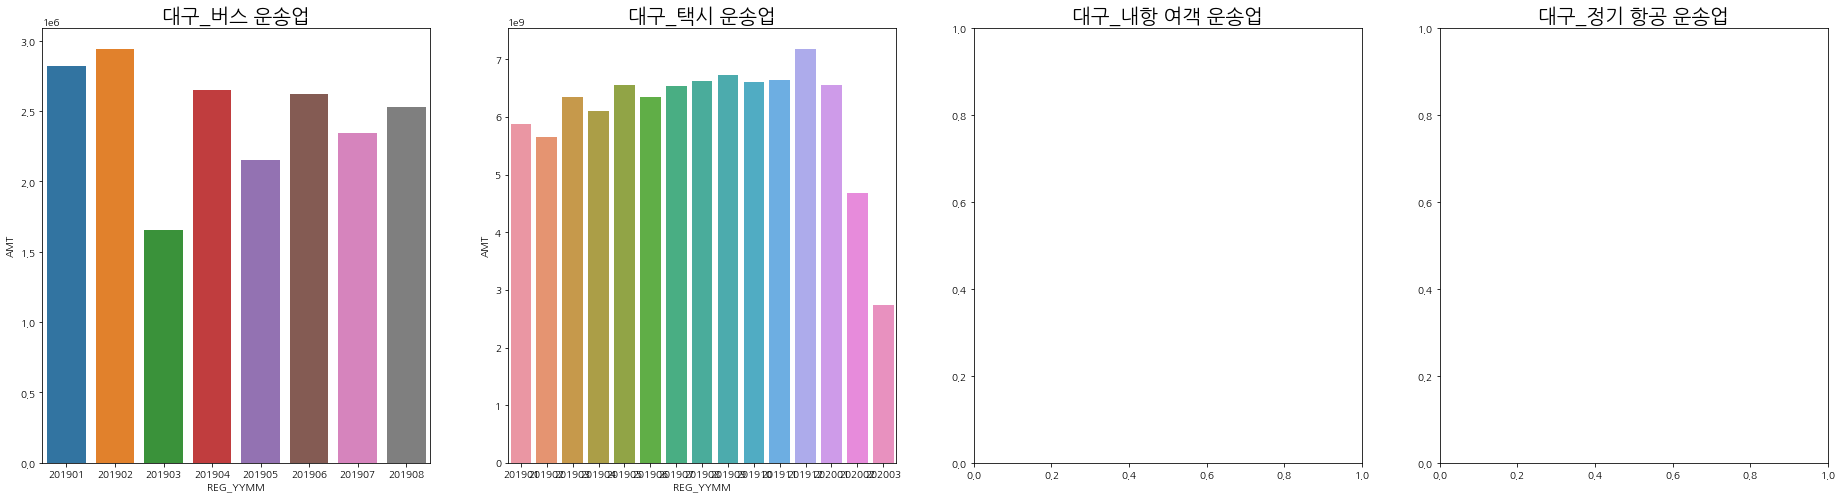

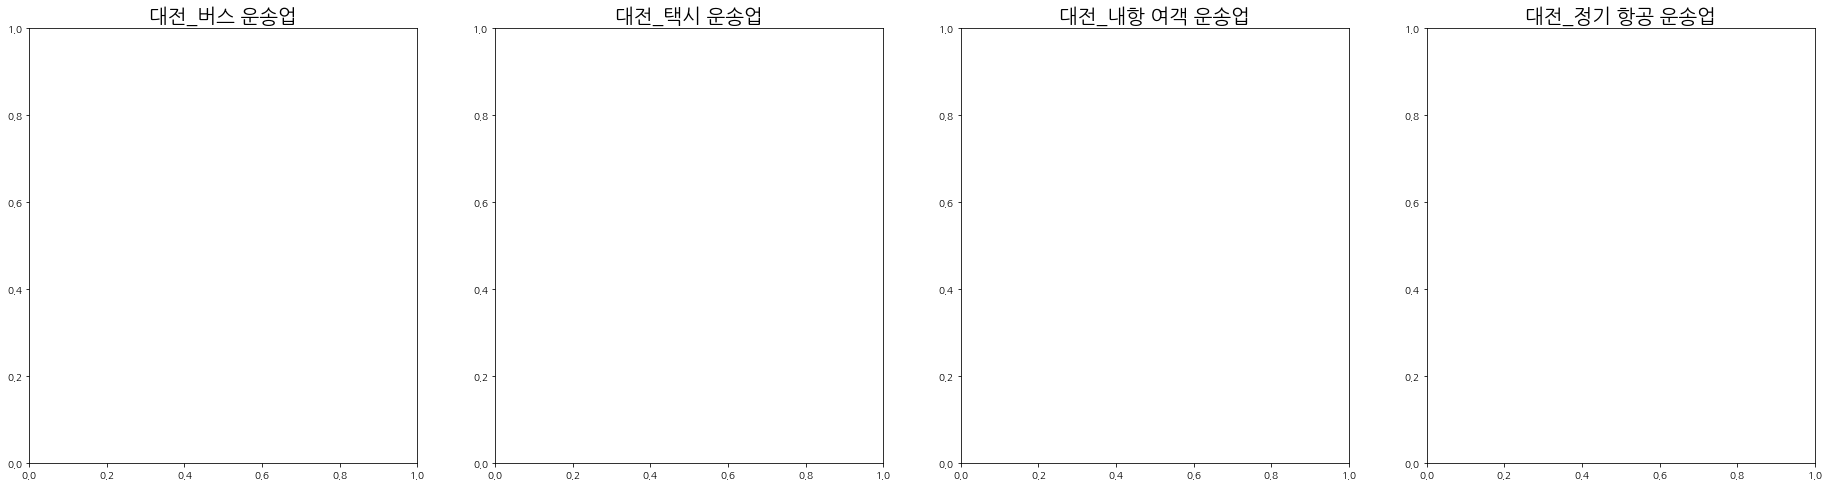

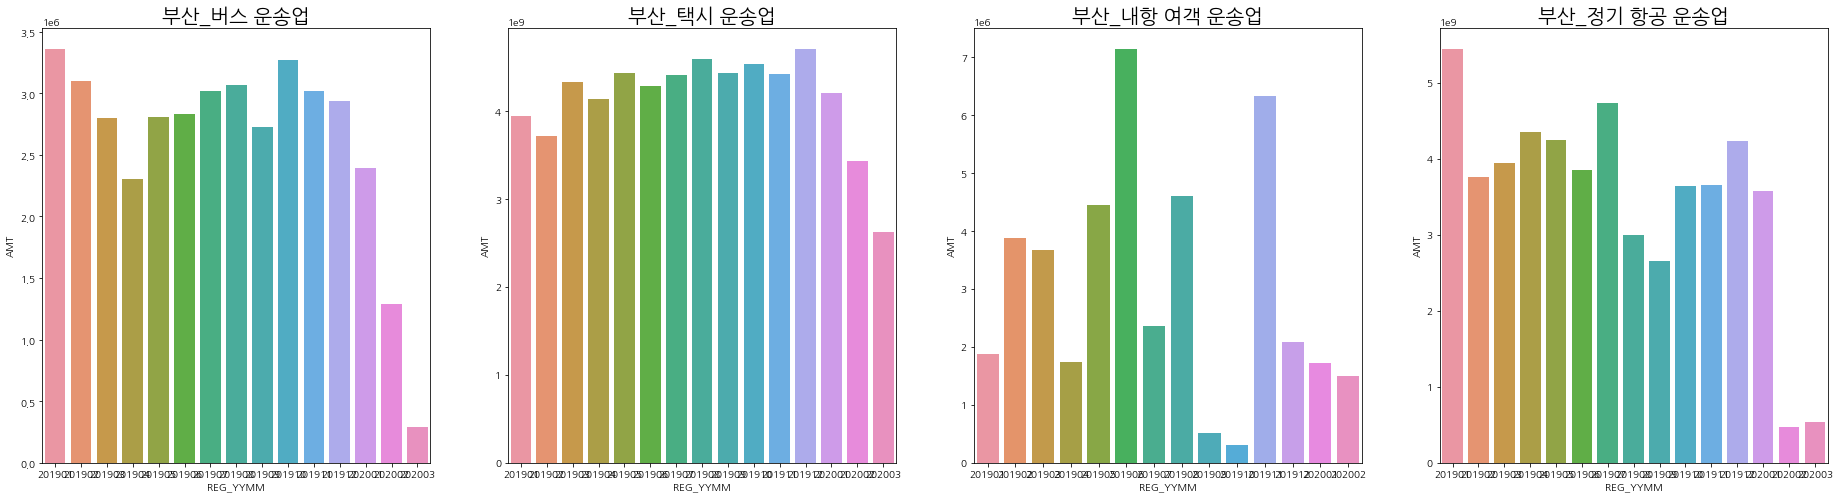

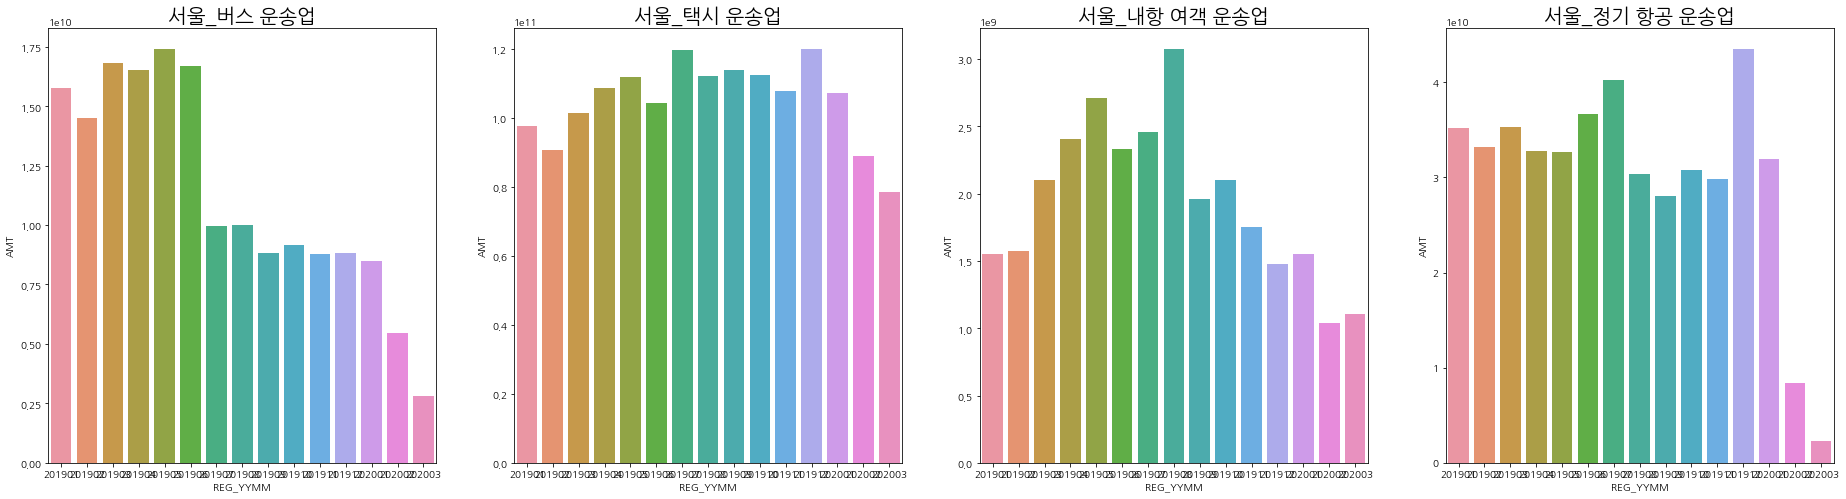

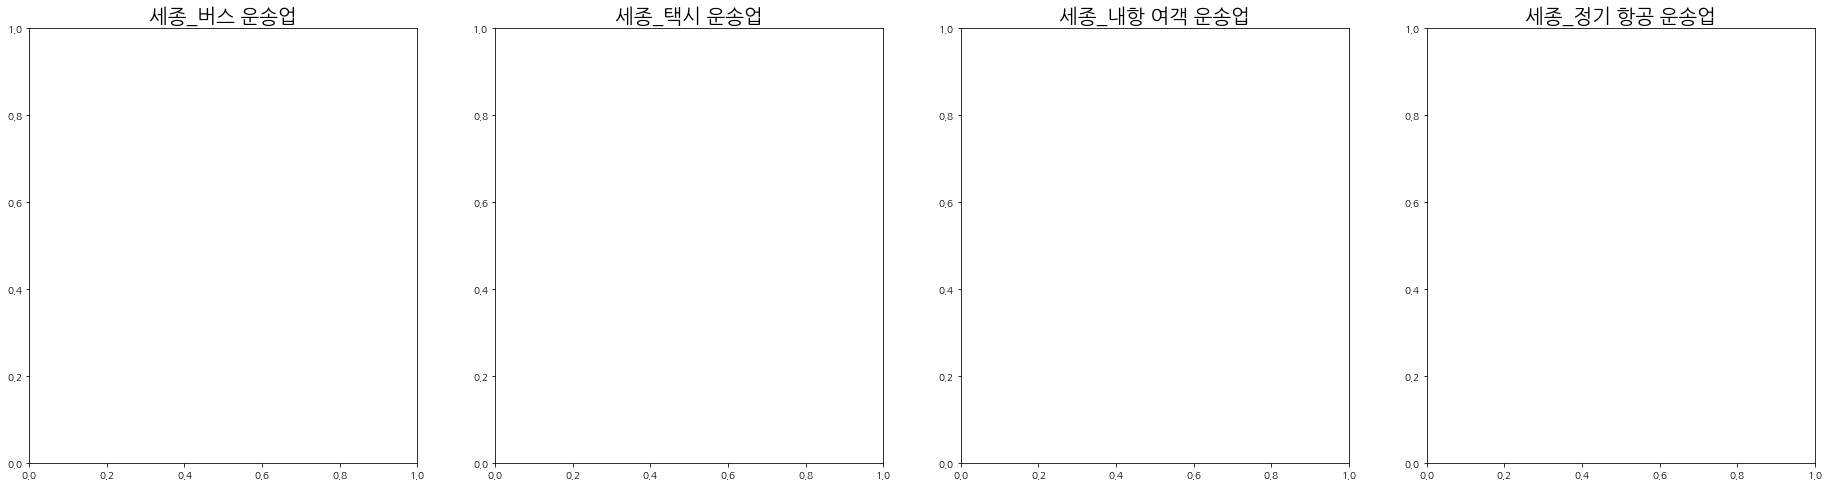

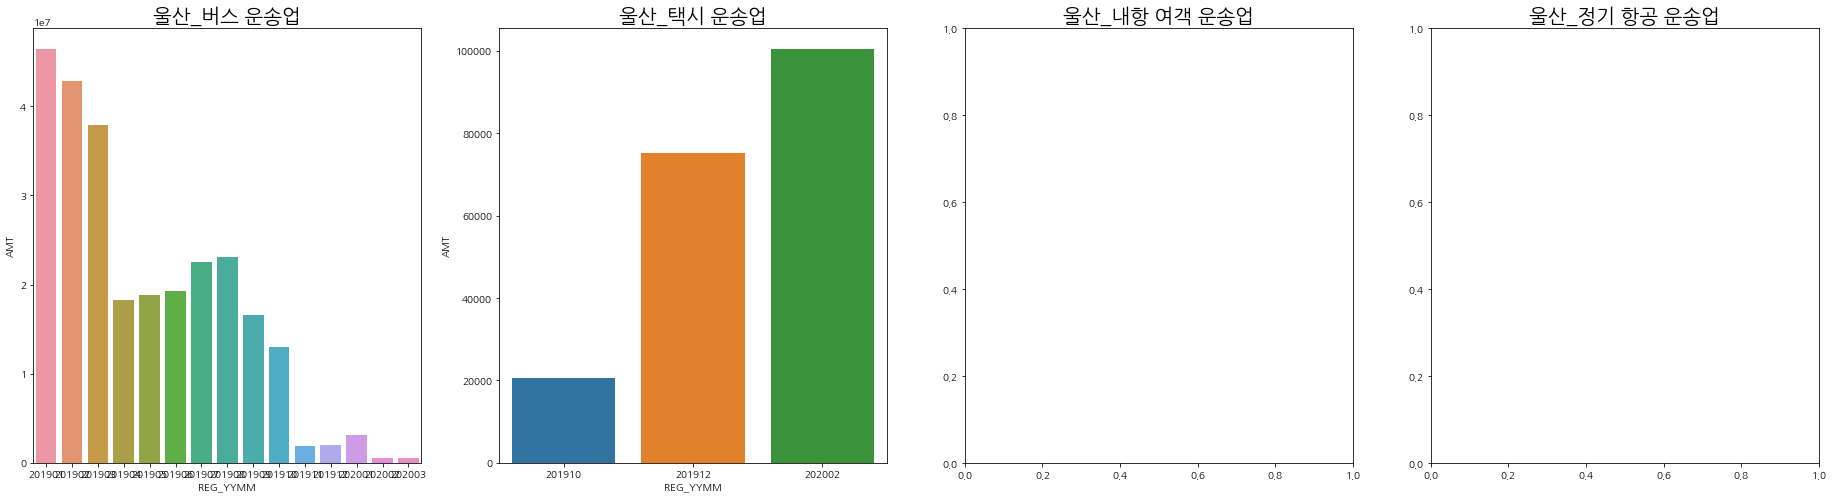

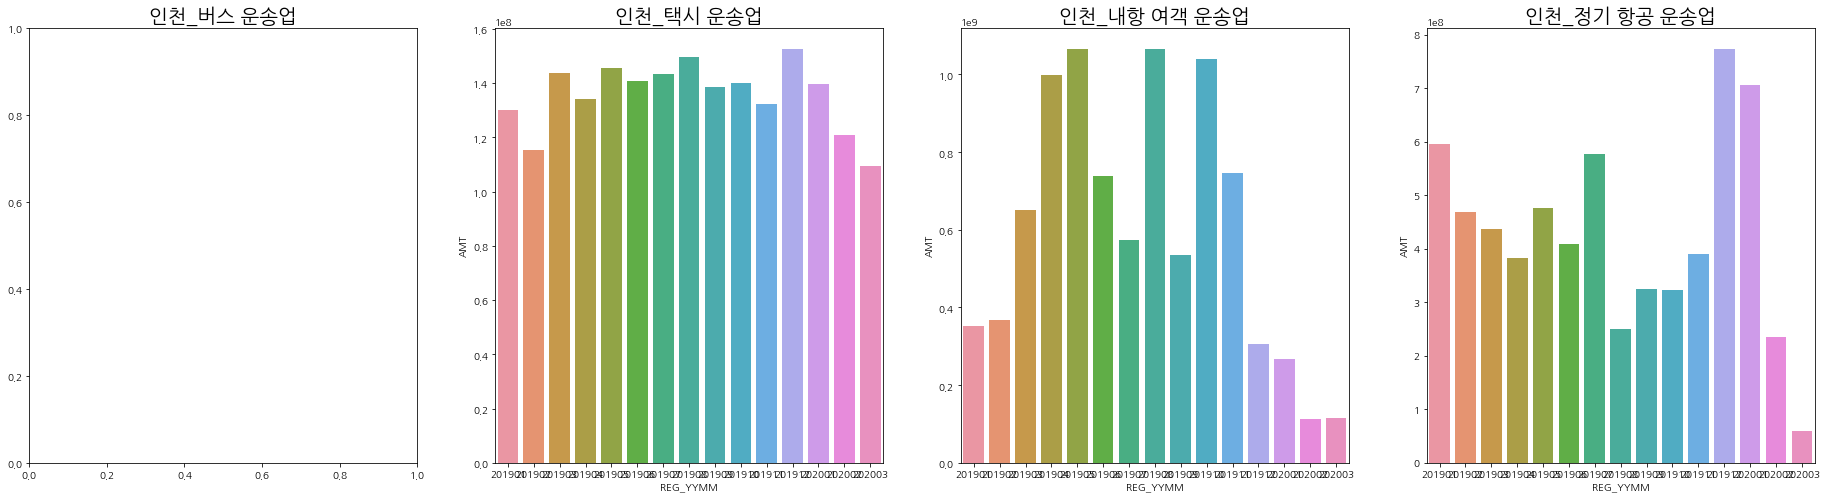

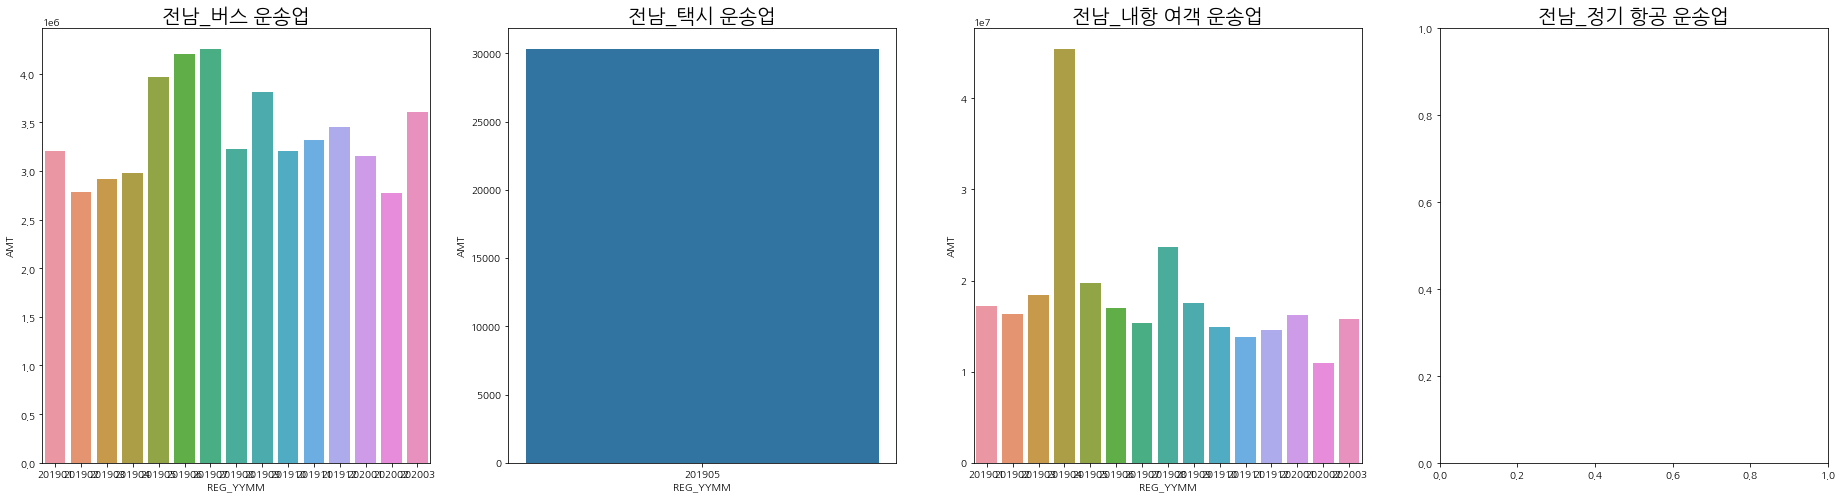

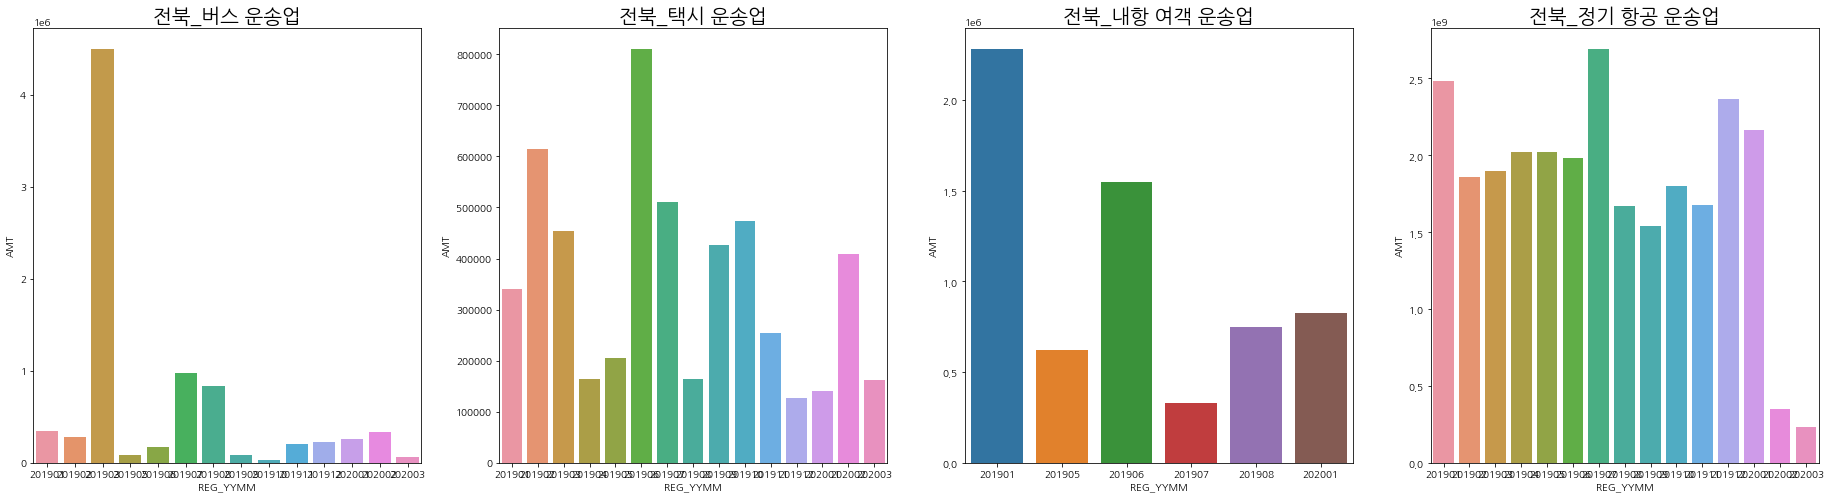

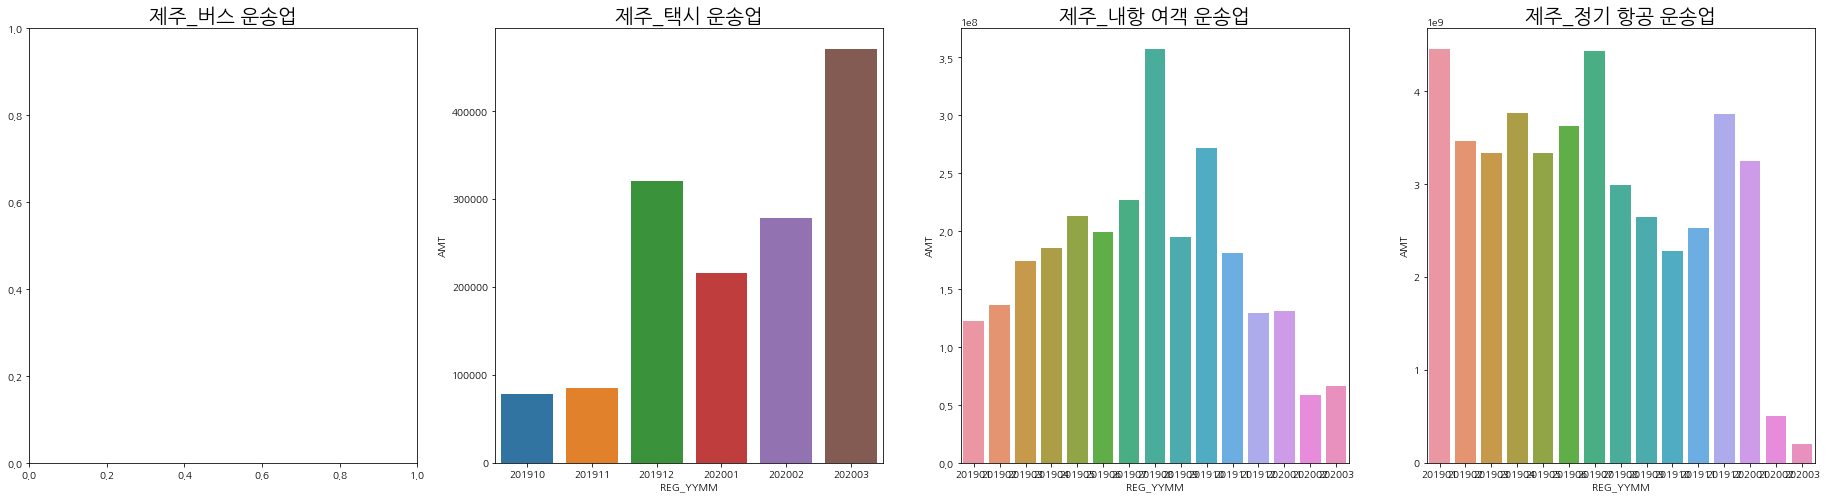

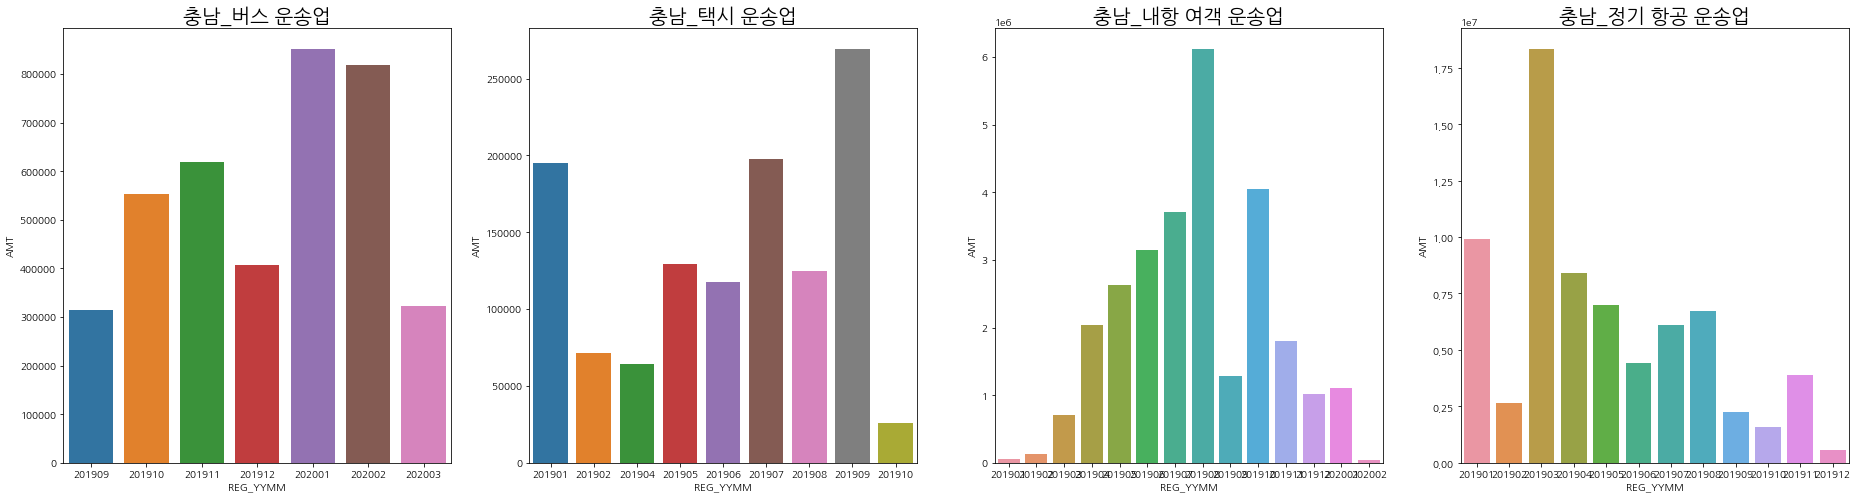

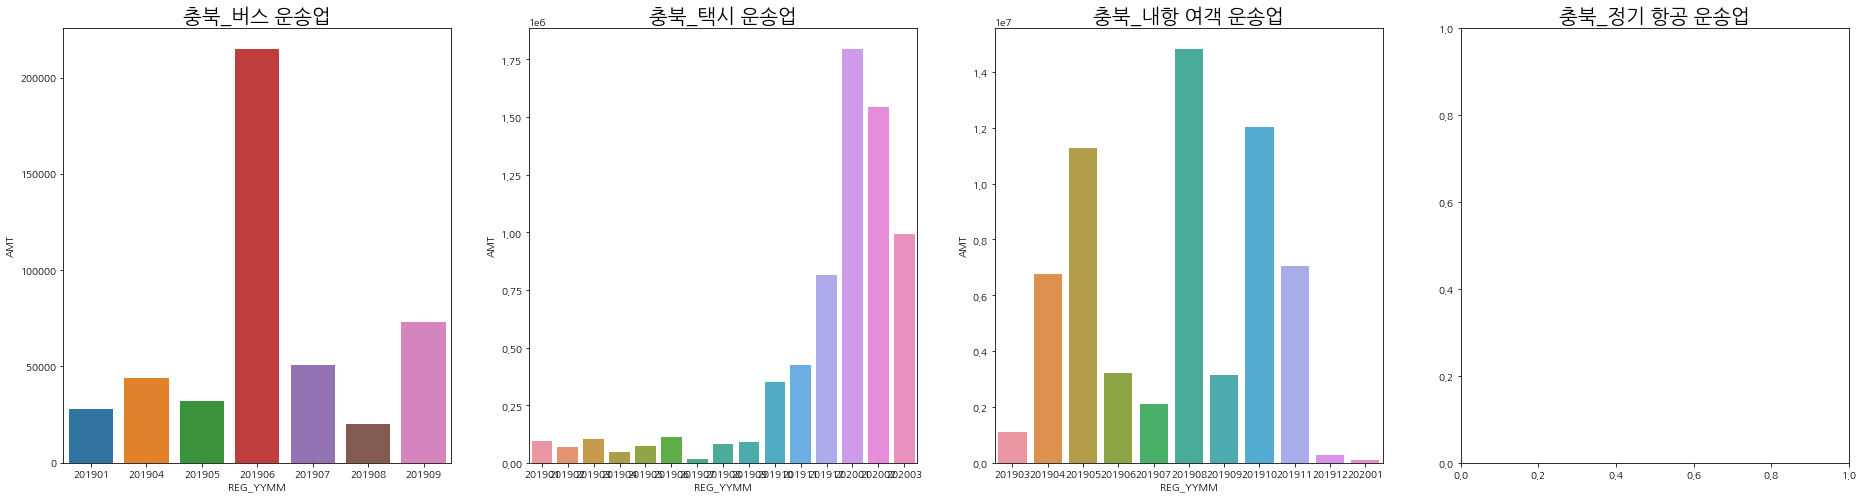

In [99]:
city_tran_plot()

In [103]:
data2 = df.loc[(df['CARD_SIDO_NM']=='충북')&(df['STD_CLSS_NM']=='버스 운송업')]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,OTHER_NM
1594664,201901,충북,청주시 흥덕구,버스 운송업,충북,청주시 서원구,50s,2,4,3,28000,3,False
6511619,201904,충북,청주시 흥덕구,버스 운송업,충북,청주시 청원구,30s,1,2,3,26000,3,False
6511620,201904,충북,청주시 흥덕구,버스 운송업,충북,청주시 흥덕구,60s,2,5,3,18000,3,False
8283146,201905,충북,청주시 흥덕구,버스 운송업,충북,청주시 서원구,60s,1,5,4,32000,5,False
9996491,201906,충북,청주시 흥덕구,버스 운송업,경기,성남시 분당구,40s,1,3,3,32000,4,True
9996492,201906,충북,청주시 흥덕구,버스 운송업,세종,NaN,40s,1,3,3,183000,12,True
11718208,201907,충북,청주시 흥덕구,버스 운송업,충북,청주시 서원구,50s,1,4,3,21000,3,False
11718209,201907,충북,청주시 흥덕구,버스 운송업,충북,청주시 흥덕구,40s,1,3,3,30000,3,False
13597044,201908,충북,청주시 흥덕구,버스 운송업,충북,청주시 흥덕구,30s,1,2,3,20000,3,False
15331868,201909,충북,청주시 흥덕구,버스 운송업,경기,성남시 분당구,50s,1,4,3,41000,3,True


In [100]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,OTHER_NM
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,False
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,False
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,False
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,False
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,False


In [ ]:
# 전북, 버스 운송업, 

### 내항 여객 운송업

국내항간에 선박을 취항하여 여객을 운송하는 산업활동을 말한다.

<예 시>
・내항 정기 여객 운송 ・내항 부정기 여객 운송
・내항여객선 임대(승무원 딸린) ・유람선 운영(국내항간)

<제 외>
・항만내의 화물 및 여객 운송(50203)

<색인어>
관광선운행(유람선 승무원딸린), 관광유람선운영(해상 승무원딸린), 연안순항여객선운영(항간이동제외), 내항정기여객운송, 내항부정기여객운송, 내항여객선임대(승무원딸린), 내항여객운송서비스, 범선운송서비스(내항여객), 선박운송서비스(여객; 국내항간), 수상여객운송(국내항간), 여객선운항(내국항간), 여객수상운송서비스(국내항간), 여객운송서비스(선박; 국내항간), 여객해상운송서비스(내항간), 유람선운행(국내항간)

In [68]:
data = df.loc[df['STD_CLSS_NM'] == '내항 여객 운송업']

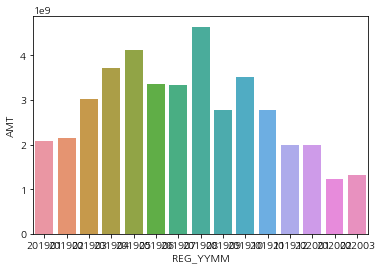

In [70]:
sns.barplot(x='REG_YYMM', y='AMT', data= data.groupby('REG_YYMM')['AMT'].sum().reset_index())

In [26]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,OTHER_NM
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,False
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,False
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,False
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,False
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,False


In [ ]:
....
clss_nm = df['STD_CLSS_NM'].unique()
print(df['STD_CLSS_NM'].isnull().sum(), len(clss_nm), clss_nm)

In [ ]:
data = df[df['CARD_SIDO_NM'] == '제주'].groupby(['REG_YYMM', 'OTHER_NM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()

In [ ]:
'''fig, ax= plt.subplots(1, 1, figsize=(12, 6))
data2= data.loc[data['OTHER_NM'] ==True].groupby(['REG_YYMM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()
sns.barplot(x='REG_YYMM', y='AMT', hue='STD_CLSS_NM', data=data2, ax=ax)'''

### 건강보조식품 소매업

In [ ]:
data = df.loc[df['STD_CLSS_NM']== clss_nm[0]]

In [ ]:
data.groupby('REG_YYMM')['AGE'].count()

In [ ]:
df.head()

## Data preprocessing

In [ ]:
del data, df
gc.collect()

In [ ]:
df = pd.read_csv('../input/dacon-jeju/201901-202003.csv')
sub = pd.read_csv('../input/dacon-jeju/submission.csv')

In [ ]:
df.head()

In [ ]:
id_dict = dict()
id_dict['CARD_SIDO_NM'] = {i:num for num, i in enumerate(df['CARD_SIDO_NM'].unique())}
id_dict['CARD_CCG_NM'] = {i:num for num, i in enumerate(df['CARD_CCG_NM'].unique())}
id_dict['STD_CLSS_NM'] = {i:num for num, i in enumerate(df['STD_CLSS_NM'].unique())}
id_dict['AGE'] = {i:num for num, i in enumerate(df['AGE'].unique())}

In [ ]:
def one_hot(df):
    for col in df.columns:
        if 'SIDO' in col:
            df[col] = df[col].map(id_dict['CARD_SIDO_NM'])
        elif 'CCG' in col:
            df[col] = df[col].map(id_dict['CARD_CCG_NM'])
        elif 'STD_CLSS_NM' == col:
            df[col] = df[col].map(id_dict['STD_CLSS_NM'])
        elif 'AGE' == col:
            df[col] = df[col].map(id_dict['AGE'])
    return df

In [ ]:
df = one_hot(df)
sub = one_hot(sub)

In [ ]:
data = df.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT'].sum().reset_index()

In [ ]:
data = pd.concat([data, sub.drop(columns='id')], axis=0)

In [ ]:
data['AMT_lag_1_2_m'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].transform(lambda x: x.shift(1).rolling(2).mean())
data['AMT_lag_1_2_s'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].transform(lambda x: x.shift(1).rolling(2).std())
data['AMT_lag_12'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].transform(lambda x: x.shift(12).rolling(2).std())


data['AMT_diff_1'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].transform(lambda x: x.diff(1))
data['AMT_diif_1_12'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].transform(lambda x: x.shift(1).diff(12))

In [ ]:
data.sort_values(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM']).head(20)

In [ ]:
def cnt_fe(df):
    data = df.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['CNT'].sum().reset_index()
    data['CNT_lag_1_2_m'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['CNT'].transform(lambda x: x.shift(1).rolling(2).mean())
    data['CNT_lag_1_2_s'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['CNT'].transform(lambda x: x.shift(1).rolling(2).std())
    data['CNT_lag_12'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['CNT'].transform(lambda x: x.shift(12).rolling(2).std())


    data['CNT_diff_1'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['CNT'].transform(lambda x: x.diff(1))
    data['CNT_diif_1_12'] = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['CNT'].transform(lambda x: x.shift(1).diff(12))
    return data

In [ ]:
data2 = cnt_fe(df)

In [ ]:
data2.head()

In [ ]:
data = data.merge(data2, on=['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])

In [ ]:
data.head()

In [ ]:
sub.head()